# Информация о датасете

In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [31]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [32]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

ID - ID пациента

Diabetes_012 - Диабет (0 = нет диабета, 1 = преддиабет или диабет)

HighBP - Высокое давление (0 = нет, 1 = есть)

HighChol - Высокий холестерин (0 = нет, 1 = есть)

CholCheck - Проверка холестерина за последние 5 лет (0 = не проверял, 1 = проверял)

BMI - Индекс массы тела (ИМТ)

Smoker - Курильщик (выкурил ли хотя бы 100 сигарет за всю жизнь) (0 = нет, 1 = да)

Stroke - Инсульт (0 = не было, 1 = было)

HeartDiseaseorAttack - Болезнь сердца или инфаркт (0 = нет, 1 = есть)

PhysActivity - Физическая активность за последние 30 дней (не включая работу) (0 = нет, 1 = да)

Fruits - Употребление фруктов 1+ раз в день (0 = нет, 1 = да)

Veggies - Употребление овощей 1+ раз в день (0 = нет, 1 = да)

HvyAlcoholConsump - Злоупотребление алкоголем (мужчины: более 14 порций в неделю, женщины: более 7 порций) (0 = нет, 1 = да)

AnyHealthcare - Наличие медицинской страховки (0 = нет, 1 = есть)

NoDocbcCost - Не мог обратиться к врачу из-за стоимости в последние 12 месяцев (0 = нет, 1 = да)

GenHlth - Общая оценка здоровья (шкала 1-5: 1 = отлично, 2 = очень хорошо, 3 = хорошо, 4 = удовлетворительно, 5 = плохо)

MentHlth - Дней с плохим психическим здоровьем за последние 30 дней (шкала 1-30)

PhysHlth - Дней с плохим физическим здоровьем за последние 30 дней (шкала 1-30)

DiffWalk - Серьезные трудности при ходьбе или подъеме по лестнице (0 = нет, 1 = да)

Sex - Пол (0 = женщина, 1 = мужчина)

Age - Возрастная категория (13 уровней: 1 = 18-24, 9 = 60-64, 13 = 80+)

Education - Уровень образования (шкала 1-6: 1 = не посещал школу, 2 = 1-8 классы, 3 = 9-11 классы, 4 = 12 класс или аттестат, 5 = 1-3 года колледжа, 6 = 4+ года колледжа)

Income - Уровень дохода (шкала 1-8: 1 = менее 10,000, 5 = менее 35,000, 8 = 75,000+)

# Анализ дубликатов

Этот датасет - анонимный опрос BRFSS, поэтому в нем нет персональных идентификаторов.

Мы не можем отличить двух разных людей с одинаковыми характеристиками и технические дубликаты/ошибки.

In [34]:
duplicate_counts = df.groupby(list(df.columns)).size().reset_index(name='count')
duplicates = duplicate_counts[duplicate_counts['count'] > 1]

print(str(len(duplicates)) + ' уникальных комбинаций, которые повторяются')
print('Всего записей-дубликатов: ' + str(duplicates['count'].sum() - len(duplicates)))

11187 уникальных комбинаций, которые повторяются
Всего записей-дубликатов: 23899


В исходном датасете обнаружено 23 899 полных дубликатов (9,4% от общего объёма 253 680 записей). Эти записи представляют собой абсолютно идентичные строки по всем 22 признакам, включая целевой показатель Diabetes_012.

Давайте посмотрим, какова вероятность того, что дубликаты - разные люди

In [35]:
# для бинарных признаков (0/1) - вероятность 0.5
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# для категориальных с k категориями - вероятность 1/k
probabilities = {
    'GenHlth': 1/5,      # 5 категорий (1-5)
    'MentHlth': 1/31,    # 0-30 дней
    'PhysHlth': 1/31,    # 0-30 дней
    'Age': 1/13,         # 13 возрастных групп
    'Education': 1/6,    # 6 уровней образования
    'Income': 1/8,       # 8 уровней дохода
    'BMI': 1/50,         # примерный диапазон BMI (15-65)
}

# рассчитаем общую вероятность совпадения 22 признаков
prob_binary = 0.5 ** len(binary_cols)  # все бинарные признаки совпали
prob_categorical = np.prod(list(probabilities.values()))  # все категориальные совпали
prob_total = prob_binary * prob_categorical

print(f"Вероятность совпадения всех бинарных признаков: {prob_binary:.2e}")
print(f"Вероятность совпадения всех категориальных признаков: {prob_categorical:.2e}")
print(f"Общая вероятность совпадения ВСЕХ 22 признаков: {prob_total:.2e}")
print(f"Это 1 шанс из {1/prob_total:.0e}")

Вероятность совпадения всех бинарных признаков: 6.10e-05
Вероятность совпадения всех категориальных признаков: 6.67e-09
Общая вероятность совпадения ВСЕХ 22 признаков: 4.07e-13
Это 1 шанс из 2e+12


При анализе выборки BRFSS 2015 года такие полные совпадения статистически крайне маловероятны для независимых наблюдений. Это указывает на артефакт сбора или обработки данных, а не на реальных пациентов с одинаковыми характеристиками. Удаление этих записей устранит систематическую ошибку и повысит достоверность анализа.

Теперь посмотрим, повлияет ли удаление дубликатов на распределение.

In [36]:
print(f"Всего строк: {len(df)}")
print(f"Полных дубликатов: {len(df[df.duplicated()])}")

# проверим влияние удаления всех дубликатов (оставляем по 1)
df_unique = df.drop_duplicates()
print(f"Было: {len(df)} записей")
print(f"После удаления дубликатов: {len(df_unique)} записей")
print(f"Удалится записей: {len(df) - len(df_unique)}")

# сравним распределение Diabetes_012
before = df['Diabetes_012'].value_counts(normalize=True).sort_index()
after = df_unique['Diabetes_012'].value_counts(normalize=True).sort_index()

print(f"\nРаспределение Diabetes_012:")
print(f"{'Класс':<10} {'ДО':<10} {'ПОСЛЕ':<10} {'Разница':<10}")
for i in range(len(before)):
    diff = after.iloc[i] - before.iloc[i]
    print(f"{before.index[i]:<10} {before.iloc[i]:<10.4f} {after.iloc[i]:<10.4f} {diff:>10.4f}")

Всего строк: 253680
Полных дубликатов: 23899
Было: 253680 записей
После удаления дубликатов: 229781 записей
Удалится записей: 23899

Распределение Diabetes_012:
Класс      ДО         ПОСЛЕ      Разница   
0.0        0.8424     0.8271        -0.0153
1.0        0.0183     0.0201         0.0019
2.0        0.1393     0.1527         0.0134


Можно сказать "распределение изменилось умеренно", но это все равно значимо для точного анализа. Главный аргумент для удаления — математическая невозможность одинаковых людей, а не величина изменения распределения.

Удаляем не потому что "почти не поменялось", а потому что это технические дубли (вероятность случайности ~10⁻¹³). Они искажают реальную распространённость диабета, нарушают принцип независимости наблюдений для статистических тестов.
То, что распределение изменилось (меньше здоровых профилей, больше диабетиков) — как раз подтверждает необходимость удаления, а не наоборот.

In [37]:
df = df_unique

# Распределение индекса массы тела

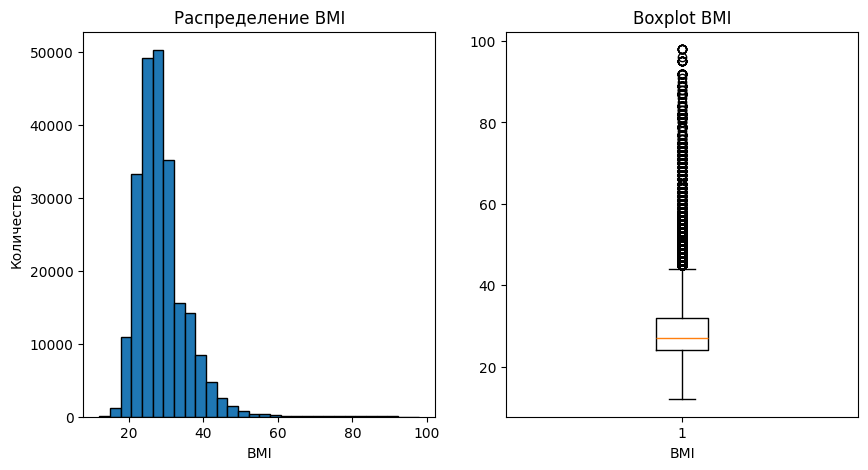

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['BMI'], bins=30, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Количество')
plt.title('Распределение BMI')

plt.subplot(1, 2, 2)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.title('Boxplot BMI')

plt.show()

Гистограмма показывает, что распределение индекса массы тела (BMI) имеет выраженную правостороннюю скошенность. Основная масса значений сосредоточена в диапазоне 20-40, что соответствует категориям от дефицита веса до ожирения второй степени. Основной пик приходится на зону избыточной массы тела (30 BMI), что свидетельствует о том, что наиболее типичным для исследуемых людей является предожирение.

На боксплоте хорошо видны многочисленные выбросы сверху, что указывает на наличие довольно большого количества людей с тяжелыми формами ожирения. Но также наблюдаются выбросы снизу, которые фиксируют случаи выраженного дефицита массы тела.

# Распределение высокого давления и высокого холестерина

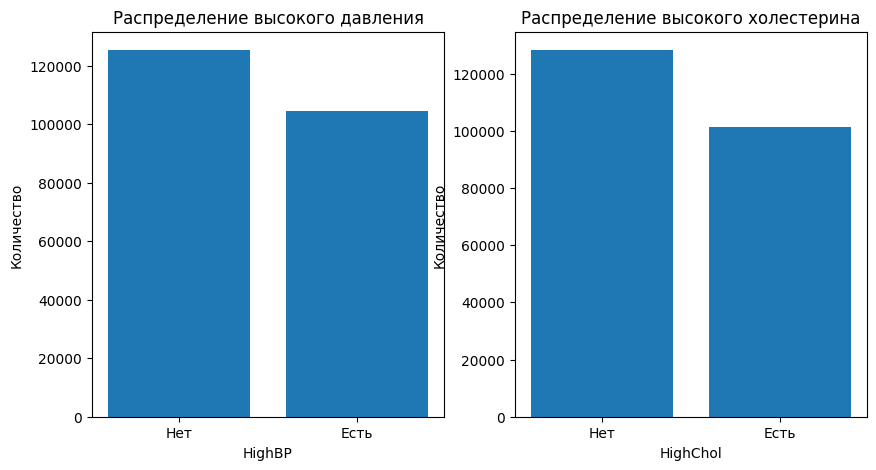

In [83]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
highbp_counts = df['HighBP'].value_counts()
plt.bar(['Нет', 'Есть'], highbp_counts.values)
plt.xlabel('HighBP')
plt.ylabel('Количество')
plt.title('Распределение высокого давления')

plt.subplot(1, 2, 2)
highchol_counts = df['HighChol'].value_counts()
plt.bar(['Нет', 'Есть'], highchol_counts.values)
plt.xlabel('HighChol')
plt.ylabel('Количество')
plt.title('Распределение высокого холестерина')

plt.show()

Среди исследуемых примерно 124 тысячи человек не имеют высокого давления, а около 103 тысяч страдают от него. Что касается уровня холестерина, то около 126 тысяч человек не имеют его повышенного уровня, в то время как имеют около 102 тысяч.

Такое распределение наблюдений указывает на достаточное количество как групп без факторов риска, так и групп с проблемами с давлением и холестерином, что позволяет проводить корректный сравнительный анализ факторов, связанных с диабетом.

# Взаимосвязь между индексом массы тела и диабетом

/tmp/ipython-input-1122373355.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_diabetes, with_diabetes], labels=['Нет диабета', 'Диабет/преддиабет'])


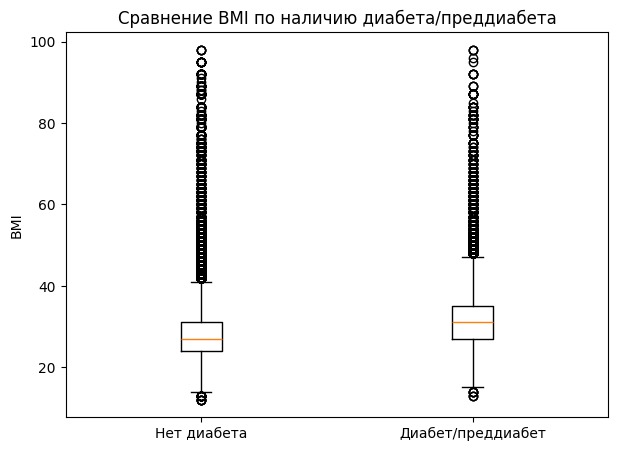

In [78]:
plt.figure(figsize=(7, 5))
no_diabetes = df[df['Diabetes_012'] == 0]['BMI']
with_diabetes = df[df['Diabetes_012'].isin([1, 2])]['BMI']
plt.boxplot([no_diabetes, with_diabetes], labels=['Нет диабета', 'Диабет/преддиабет'])
plt.ylabel('BMI')
plt.title('Сравнение BMI по наличию диабета/преддиабета')

plt.show()

Группа без диабета с медианой BMI 27.0 находится в категории избыточной массы тела (предожирение). Преддиабет и диабет с медианой около 30.0 достигают категории ожирения первой степени. Наблюдаем увеличение индекса массы тела на 3-4 единицы при переходе от здорового состояния к заболеванию.

# Взаимосвязь между высоким давлением и диабетом

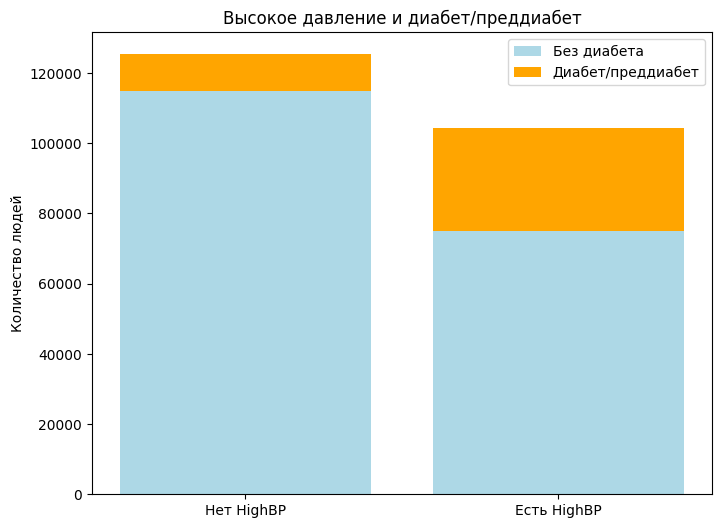

In [81]:
contingency_table_bp = pd.crosstab(df['HighBP'], df['Diabetes_012'])
diagnosis = contingency_table_bp[1] + contingency_table_bp[2]

plt.figure(figsize=(8, 6))
plt.bar([0, 1], contingency_table_bp[0], label='Без диабета', color='lightblue')
plt.bar([0, 1], diagnosis, bottom=contingency_table_bp[0], label='Диабет/преддиабет', color='orange')
plt.xticks([0, 1], ['Нет HighBP', 'Есть HighBP'])
plt.ylabel('Количество людей')
plt.title('Высокое давление и диабет/преддиабет')
plt.legend()

plt.show()

На графике видно, что среди людей с высоким артериальным давлением доля пациентов с диабетом или преддиабетом заметно выше, чем среди людей без гипертонии.

# Взаимосвязь между высоким холестерином и диабетом

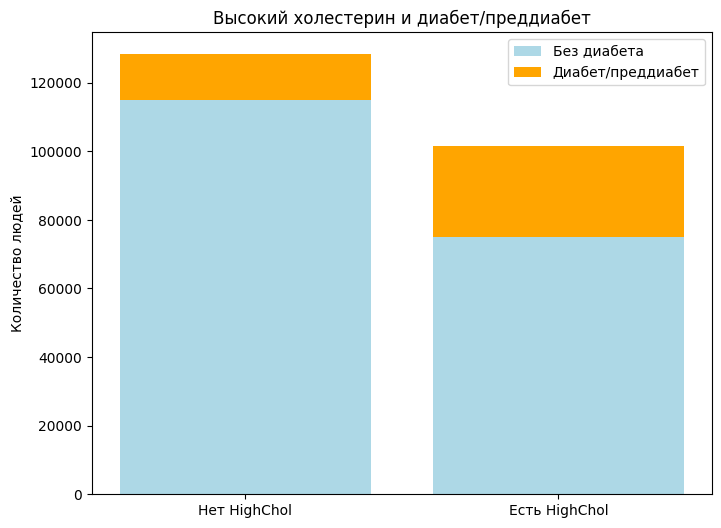

In [82]:
contingency_table = pd.crosstab(df['HighChol'], df['Diabetes_012'])
diagnosis = contingency_table[1] + contingency_table[2]

plt.figure(figsize=(8, 6))
plt.bar([0, 1], contingency_table[0], label='Без диабета', color='lightblue')
plt.bar([0, 1], diagnosis, bottom=contingency_table[0], label='Диабет/преддиабет', color='orange')
plt.xticks([0, 1], ['Нет HighChol', 'Есть HighChol'])
plt.ylabel('Количество людей')
plt.title('Высокий холестерин и диабет/преддиабет')
plt.legend()

plt.show()

Здесь также заметим, что среди людей с высоким холестерином доля пациентов с диабетом или преддиабетом выше, чем среди людей без этого показателя.

# Корреляционный анализ

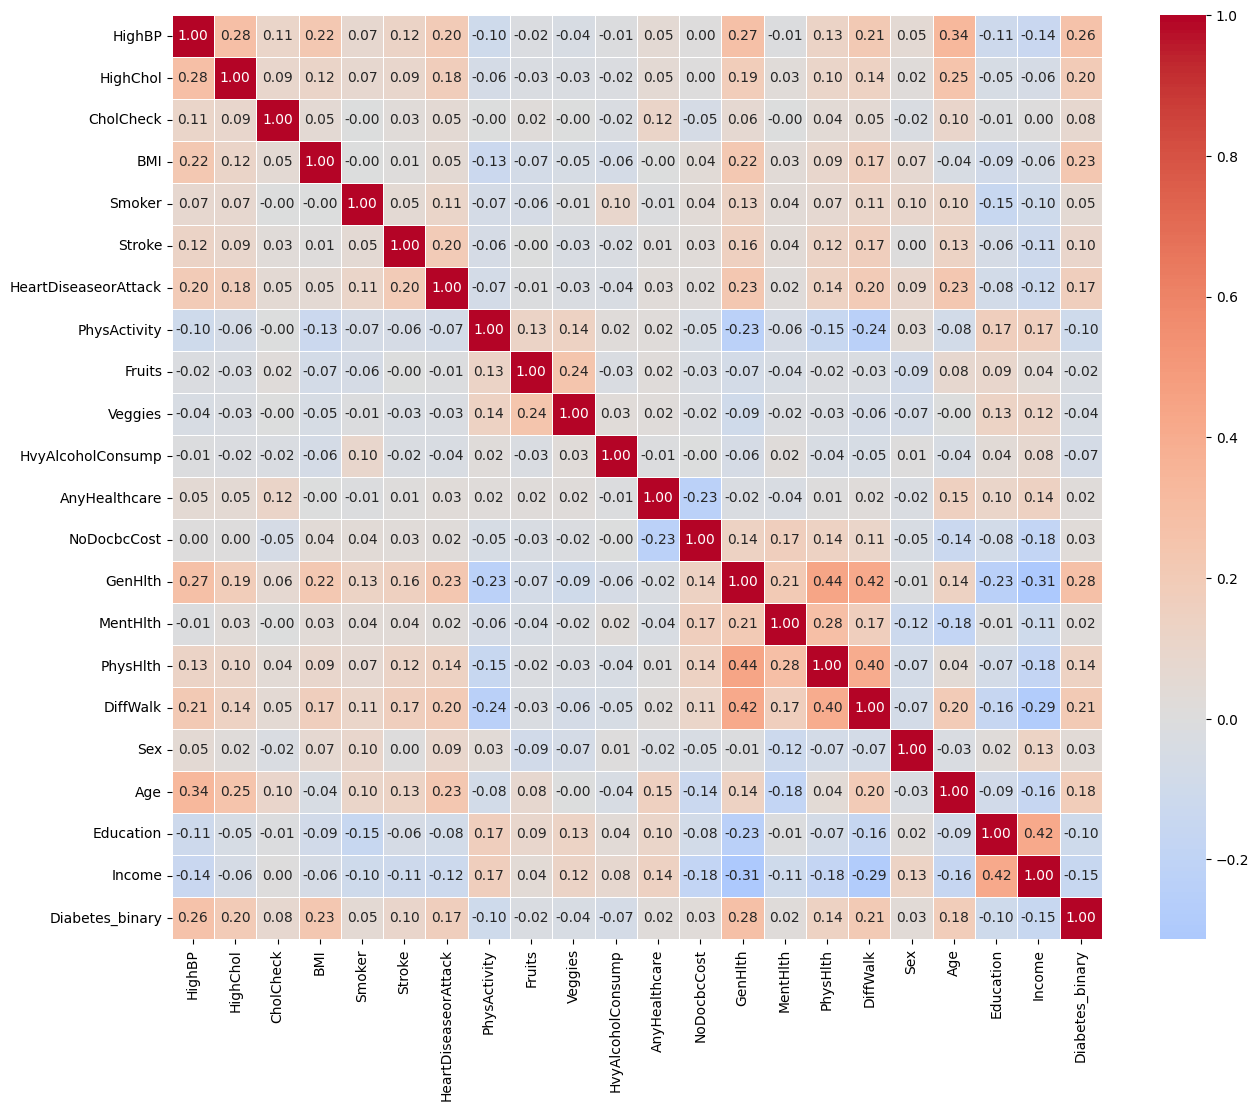

In [77]:
df['Diabetes_binary'] = (df['Diabetes_012'] >= 1).astype(int)

predictor_columns = [col for col in df.columns if col not in ['Diabetes_012', 'Diabetes_binary'] and df[col].dtype in [np.float64, np.int64]]
columns_for_corr = predictor_columns + ['Diabetes_binary']
correlation_matrix = df[columns_for_corr].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5)

plt.show()

Проведённый корреляционный анализ показал, что наиболее сильную корреляцию с Diabetes_binary имеет GenHlth (0.28), что указывает на то, что ухудшение оценки здоровья ассоциировано с более высокой вероятностью наличия диабета. Положительную связь с диабетом также демонстрируют клинически значимые факторы, такие как наличие высокого артериального давления (0.26), индекс массы тела (0.23) и повышенный уровень холестерина (0.20). Также диабет связан с функциональными ограничениями (0.21) и возрастом (0.18), отражая накопительный характер риска с течением времени.

Общая оценка здоровья - GenHlth, PhysHlth - число дней с плохим физическим здоровьем за последние 30 дней и DiffWalk - наличие серьёзных трудностей при ходьбе или подъёме по лестнице демонстрируют умеренные взаимные корреляции: между GenHlth и PhysHlth (0.44), между PhysHlth и DiffWalk (0.40), а также между GenHlth и DiffWalk (0.42). Эти связи отражают частичное дублирование информации о состоянии здоровья и функциональных ограничениях и являются ожидаемыми. Кроме того, умеренная положительная корреляция наблюдается между показателями Education и Income (r ≈ 0.42), что отражает типичную зависимость между уровнем образования и дохода. При этом величины корреляций не достигают критических значений, что свидетельствует об отсутствии выраженной мультиколлинеарности.

# Выдвигаемые гипотезы

В ходе анализа результатов было выявлено, что среди людей с повышенным артериальным давлением доля пациентов с диабетом или преддиабетом заметно выше, чем среди лиц без гипертонии. Данная закономерность наблюдается как на визуализациях распределений, так и подтверждается результатами корреляционного анализа, выявившего умеренную положительную связь между этими параметрами.

На основе этого была выдвинута гипотеза о том, что **доля людей с диабетом или преддиабетом выше среди лиц с повышенным артериальным давлением по сравнению с людьми без него**.

С бизнес-точки зрения полученный результат представляет значительный интерес, поскольку люди с гипертонией могут рассматриваться как приоритетная целевая группа для профилактических и диагностических программ. Это открывает возможности для разработки и внедрения персонализированных программ скрининга, мониторинга показателей здоровья и коррекции образа жизни.

Также было выявлено, что ухудшение общего состояния здоровья (GenHlth) связано с более высокой вероятностью наличия диабета, тк данный показатель демонстрирует наиболее сильную корреляцию с Diabetes_binary среди всех рассмотренных признаков. Также интересно, что GenHlth умеренно коррелирует с числом дней с плохим физическим здоровьем (PhysHlth) и наличием серьёзных трудностей при ходьбе (DiffWalk), что указывает на комплексное ухудшение физического и функционального состояния, сопровождающее рост риска диабета.

Выдвигаемая гипотеза: **люди с худшей самооценкой общего состояния здоровья (GenHlth) имеют более высокую вероятность наличия диабета или преддиабета по сравнению с людьми с лучшей оценкой общего здоровья.**

С практической и бизнес-точки зрения это позволяет использовать субъективные оценки состояния здоровья людей как простой инструмент предварительного скрининга. Такие показатели могут быть эффективно интегрированы в маркетинговые стратегии, например в виде опросников или рекламных сообщений, ориентированных на людей, отмечающих ухудшение самочувствия или подвижности, с целью мотивировать их пройти раннее обследование в клинике.